# TP2 - Machine Learning

## Objectifs du TP

Il s'agit ici de développer des classifieurs simples. Dans un premier
temps, dans le cas de données linéairement séparables, nous allons
élaborer un premier modèle basé sur la séparation des barycentres des
classes. Cette première étape permettra de nous familiariser avec la
représentation graphique de données 2D en Python. Dans une deuxième
phase, nous allons développer l'algorithme dit des *$k$ plus proches
voisins* et nous l'appliquerons à la base de données `IRIS`. Pour
manipuler les données de cette base, nous utiliserons le package
`pandas` vu lors du TP précédent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 - Génération de données 2D et visualisation

(a) En utilisant la fonction `random()` du sous-module `random` de `numpy`, créer une
    fonction qui génère un \"nuage\" aléatoire de $n$ points 2D
    uniformément répartis autour d'une position $(x_0,y_0)$ et contenus
    dans un carré de côté $2d$ centré sur cette position. Les
    paramètres de cette fonction seront $n$, $(x_0,y_0)$ et $d$. La
    fonction renverra les coordonnées des $n$ points générés.



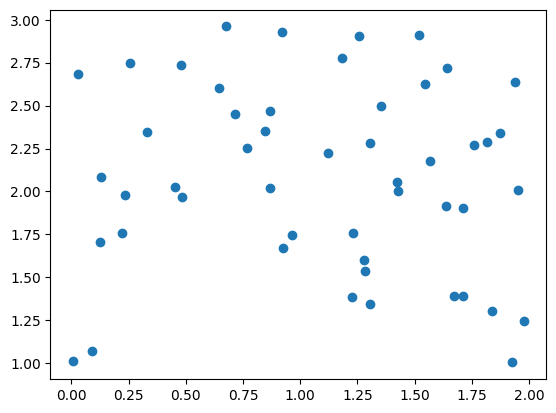

In [2]:
def nuage(x, y, n, d=1):
    X = x+d*(1.-2*np.random.random(n))
    Y = y+d*(1.-2*np.random.random(n))
    return np.array([X,Y])
nu = nuage(1,2,50)
plt.scatter(nu[0], nu[1])

(b) Créer 2 nuages de points, l'un centré en (0.3, 0.4) et l'autre centré en (0.6, 0.6), en prenant comme paramètre d = 0.1. Afficher ces deux nuages sur une figure. On utilisera ici la fonction `plot` du package `matplotlib.pyplot`. On pourra régler l'échelle des axes à l'aide des fonctions `xlim` et `ylim` de ce package. Le résultat doit ressembler à la figure suivante:

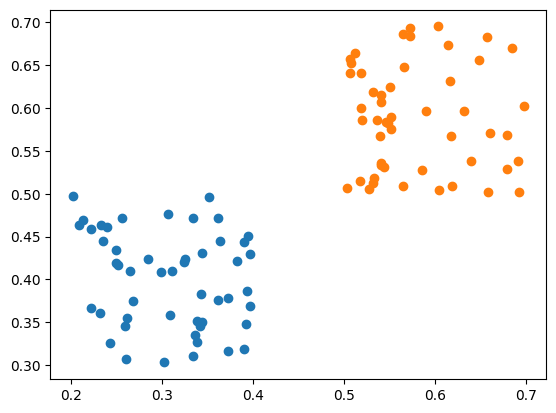

In [3]:
def plot_group(g,style="bo"):
    plt.scatter(g[0],g[1])

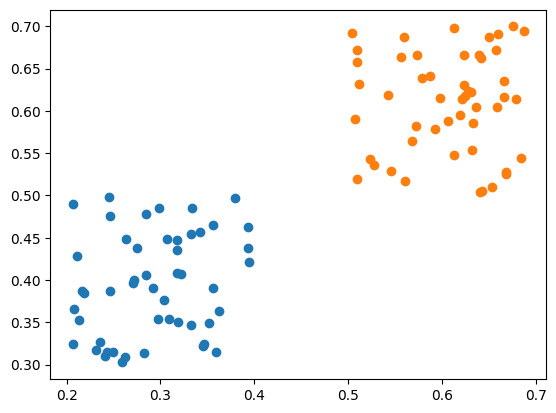

In [4]:
g1 = nuage(x=0.3, y=0.4, n=50, d=0.1)
g2 = nuage(x=0.6, y=0.6, n=50, d=0.1)


plt.xscale("linear")
plt.yscale("linear")

classes = {1:"b",-1:"r"}

plot_group(g1,"ro")
plot_group(g2,"bo")

## 2 - Classification linéaire à partir des barycentres des classes

(a) Créer une fonction qui à partir d'un nuage de points, déterminera le
    centre du nuage de points.

In [5]:
def barycentre(g):
    return np.mean(g, axis = 1)

(b) Créer ensuite une fonction de décision qui à partir des coordonnées
    d'un point P détermine dans quel groupe de points le séparateur
    précédent classe ce point P. On pourra utiliser la
    distance de P à chacun des barycentres des nuages de points.


In [6]:
def norm(u): 
    return(np.sqrt(np.sum(np.array(u)**2)))

def decision(P, g1, g2):
    c1 = barycentre(g1)
    c2 = barycentre(g2)
    return 1*(norm(P-c2) <= norm(P-c1))   # Renvoie 0 si P appartient au groupe 1 et 1 si P appartient au groupe 2

c1 = barycentre(g1)
c2 = barycentre(g2)

print(decision(c1, g1, g2))
print(decision(c2, g1, g2))

0
1


Produit scalaire L2 dans $\mathbb{R}^2$ : $<u,v> = u_1 * v_1 + u_2 * v_2 $

Norme L2 : $||u||_2 = \sqrt{u_1^2 + u_2^2}$

cos de l'angle (u,v) = $\frac{<u,v>}{||u||_2 * ||v||_2}$

Démarche de résolution avec l'angle: 
    
- On récupère la médiatrice et le vecteur directeur (g1 vers g2) entre les barycentres des groupes. 
- On calcule le vecteur entre le point M et le nouveau point P. 
- On calcul le cos de l'angle entre les deux vecteurs. 
- regle de décision : si le cos de l'angle est positif alors on affecte P à g2, si c'est négatif on affecte P à g1

(c) Faire afficher sur la figure précédente, les nuages de points, les
    barycentres, le segment qui relie les centres ainsi que la
    médiatrice.

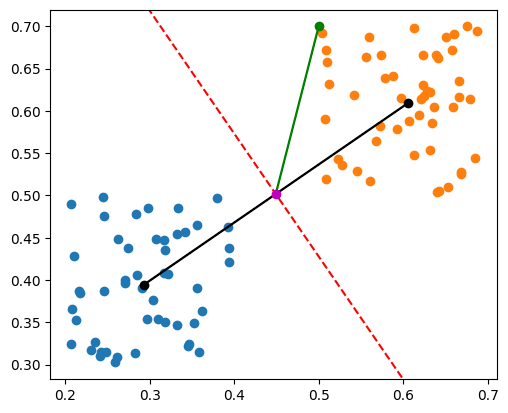

appartient au groupe 2 (orange) [Plus proche]
appartient au groupe 2 (orange) [Angle]


0.7532754385004823

In [7]:
def mediatrice(g1, g2): 
    c1 = barycentre(g1)
    c2 = barycentre(g2)
    vec = c2 - c1
    M1 = barycentre(np.transpose([c1,c2]))
    return M1, vec

def prod_scalaire(u,v): 
    return (np.sum(np.array(u)*np.array(v)))
def cos(u,v): 
    return prod_scalaire(u,v)/(norm(u)*norm(v))


def plot(g1, g2, P):
    plt.axes().set_aspect('equal')
    plt.xscale("linear")
    plt.yscale("linear")


    classes = {1:"b",-1:"r"}

    plot_group(g1,"ro")
    plot_group(g2,"bo")
    
    plt.axis('scaled')
    
    M, vec = mediatrice(g1,g2)
    med = np.array([-vec[1], vec[0]])
    
    
    x = [M[0] - med[0], M[0] + med[0]]
    y = [M[1] - med[1], M[1] + med[1]]
    
    plt.plot(x,y, color = 'red', linestyle = '--')

    c1 = barycentre(g1)
    c2 = barycentre(g2)

    plt.plot(c1[0], c1[1], 'ko') 
    plt.plot(c2[0], c2[1], 'ko') 

    
    plt.plot(M[0], M[1], 'mo') 

    plt.arrow(c1[0], c1[1], vec[0], vec[1], head_width=0, head_length=0, fc='lightblue', ec='black')

    plt.plot(P[0], P[1], 'go')
    plt.arrow(M[0], M[1], -M[0]+P[0], -M[1]+P[1], head_width=0, head_length=0, fc='lightblue', ec='green')

    
    plt.show()
    
    #   Règle de décision
    # Si on choisi le centre le plus proche
    if norm(P-c1) > norm(P-c2): 
        print("appartient au groupe 2 (orange) [Plus proche]")
    else: 
        print("appartient au groupe 1 (bleu) [Plus proche]")
    # Avec la règle de l'angle
    if cos(vec, P-M) >0: 
        print("appartient au groupe 2 (orange) [Angle]")
    else: 
        print("appartient au groupe 1 (bleu) [Angle]")
    return(cos(vec, P-M))



P = [.5,.7]

plot(g1, g2, P)

(d) Comment pourrait-on généraliser la fonction de décision précédente au cas où le
    nombre de classes est supérieur à 2 ?

*Ici il faut faire attention à la façon dont on va faire la séparatrice. Peut etre voir quel est le barycentre le plus proche ?* 

## 3 - Classification par la méthode des $k$ plus proches voisins

(a) Charger dans une `DataFrame` la base de données `IRIS` à partir du
    fichier `IRIS.csv`.

    Les colonnes de la DataFrame seront nommées
    `’sl’,’sw’,’pl’,’pw’,’class’`.

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('iris.csv', header = None)
df.columns =['sl','sw','pl','pw','class']
df

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


(b) Les valeurs de classes
    `’Iris-setosa’,’Iris-versicolor’,’Iris-virginica` seront remplacées
    par des valeurs numériques.

In [10]:
df = df.replace({'Iris-setosa':1, 'Iris-versicolor':2, "Iris-virginica":3})

(c) Créer une fonction `split` qui scindera une DataFrame en deux
    DataFrames dont l'un contiendra 80% des échantillons et l'autre 20%.
    Le premier constituera la base d'apprentissage et le second la base
    de validation (test).

In [11]:
def split(df, train_prop = 0.8):
    df_train = df.sample(frac = train_prop, replace = False)
    df_test = df.drop(df_train.index)
    return df_train, df_test
train, test = split(df)
train

,sl,sw,pl,pw,class
82,5.8,2.7,3.9,1.2,2
141,6.9,3.1,5.1,2.3,3
120,6.9,3.2,5.7,2.3,3
9,4.9,3.1,1.5,0.1,1
114,5.8,2.8,5.1,2.4,3
...,...,...,...,...,...
51,6.4,3.2,4.5,1.5,2
86,6.7,3.1,4.7,1.5,2
145,6.7,3.0,5.2,2.3,3
108,6.7,2.5,5.8,1.8,3


(d) Utiliser la fonction de mélange de la DataFrame créée lors du TP
    précédent pour mélanger les lignes de vos deux DataFrames.

In [12]:
def Melange(t): 
    return t.sample(frac = 1).reset_index(drop=True)

train = Melange(train)
test = Melange(test)
train

,sl,sw,pl,pw,class
0,6.4,2.9,4.3,1.3,2
1,5.1,2.5,3.0,1.1,2
2,6.9,3.1,5.1,2.3,3
3,7.3,2.9,6.3,1.8,3
4,7.2,3.6,6.1,2.5,3
...,...,...,...,...,...
115,6.5,3.2,5.1,2.0,3
116,7.7,2.6,6.9,2.3,3
117,5.6,2.8,4.9,2.0,3
118,5.7,3.8,1.7,0.3,1


(e) Créer une fonction qui, à partir d'un point $P$ donné, calcule la
    liste des distances Euclidiennes de $P$ à tous les autres points de
    la base d'apprentissage.

In [13]:
def dist_eucli(x,y): 
    # mettre un test pour que les vecteurs aient la même dimension 
    return np.sqrt(np.sum((np.array(x)-np.array(y))**2))
dist_eucli([1,2,3], [1,2,4])

1.0

In [14]:
def list_eucli(df, P): 
    dist = []
    for i in df.index:
        dist.append(dist_eucli(df.loc[i],P))
    return dist

(f) Créer une fonction qui à partir d'un point $P$ donné et un entier
    $k$ renverra les $k$ plus proches voisins de $P$ au sens de la
    distance Euclidienne calculée précédemment.

In [15]:
def knn(df, p, k): 
    dist = list_eucli(df, p)
    return np.argsort(dist)[0:k] #mets les k individus (index) les plus proches


x_train = train[["sl", 'sw', 'pl', 'pw']]
y_train = train[['class']]

knn(x_train, test[["sl", 'sw', 'pl', 'pw']].loc[1], k=5)

array([44, 39, 56, 79, 15], dtype=int64)

(g) Créer ensuite une fonction de décision qui, à partir d'un point $P$
    donné et du nombre de voisins $k$, renverra la classe majoritaire
    parmi les $k$ voisins de $P$ considérée comme la classe de $P$.

In [16]:
p = test[["sl", 'sw', 'pl', 'pw']].loc[1]
print(test[['class']].loc[1])
k = 5
def decisionKNN(df, p, k):
    if k == 0: 
        return 0
    x_df = df[["sl", 'sw', 'pl', 'pw']]
    y_df = df[['class']]
    indice = knn(x_df, p, k)
    return y_df.loc[indice].mode().loc[0]
    
decisionKNN(train, p, k=10)
# (test[['class']].loc[9] == y_train.loc[indice].mode())[['class']].loc[0]


class    2
Name: 1, dtype: int64


class    2
Name: 0, dtype: int64

(h) En utilisant la fonction de décision créée précédemment, créer
    maintenant une fonction qui calculera l'erreur de prédiction sur la
    base de test (le deuxième DataFrame).

In [17]:
train = train 
test = test
k = 5

def errorPredict(train, test, k):
    x_test = test[["sl", 'sw', 'pl', 'pw']]
    y_test = test[['class']]
    result = np.empty(test.shape[0])
    for i in test.index: 
        result[i] = (decisionKNN(train, x_test.loc[i], k) != y_test.loc[i])
#         print(i)
    return np.mean(result)
errorPredict(train, test, k=5)

0.0

(i) Etudier l'évolution de l'erreur de prédiction sur la base de test en
    fonction du choix de $k$.


In [18]:
# x = np.round(np.linspace(1,50,50))
x = range(1,51, 2)

y = []

nb_exp = 20

df1 = Melange(df)
for k in x:
    lExp = []
    for exp in range(nb_exp):
        trainX, testX = split(df1, train_prop = .8)
        trainX = Melange(trainX)
        testX = Melange(testX)
        lExp.append(errorPredict(trainX, testX, k =k))
    y.append(np.mean(lExp))

# y = np.array([errorPredict(train, test, k = k) for k in x])

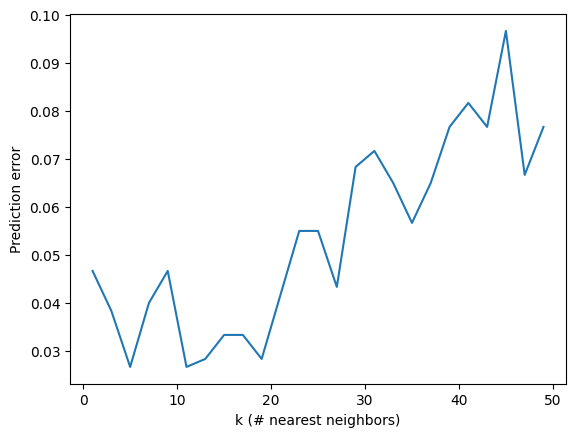

In [19]:
plt.plot(x,y)
plt.ylabel('Prediction error')
plt.xlabel('k (# nearest neighbors)')
plt.show()

(j) Créer des variantes de cet algorithme en remplaçant la distance
    Euclidienne par d'autres choix de distances.

In [20]:
def dist_manhattan(x,y): 
    return np.sqrt(np.sum(np.abs(np.array(x)-np.array(y))))
print(dist_manhattan([1,2,3], [1,2,9]))
print(dist_eucli([1,2,3], [1,2,9]))

# ... faire la mise à jour des autres fonctions

2.449489742783178
6.0


##### Amélioration possible 


###### pour améliorer le modèle 

- validation des hyperparamètres (k)
- changer la distance utilisée (refaire les fonctions en mettant une fonction de distance en paramètre d'entrée)
- changer la règle de décision (pondération des classes selon la distance y,x ; plus que la majorité, mais > 50% ?)

(Question enlevée) Etudier l'évolution de l'erreur de prédiction sur la base de test en
    fonction du nombre de points utilisés pour l'apprentissage et pour
    le test.

In [21]:
# x = np.linspace(0,1,100)[1:99]
# y = np.empty(len(x))

# k = 5

# df1 = Melange(df)
# for i in range(len(x)):
#     trainX, testX = split(df1, train_prop = x[i])
#     trainX = Melange(trainX)
#     testX = Melange(testX)
#     y[i] = errorPredict(trainX, testX, k)

*Dans la question précédente et celle présente, j'ai fais une double boucle. La première boucle permet de changer notre paramètre d'explication (les valeur de l'axe x). La deuxième boucle est faite sur le nombre d'expérience par valeur. Effectivement, si nous faisons qu'une seule simulation par cas, nous ne pouvons être sûr d'avoir la vrai valeur (ou n'avoir qu'une valeur extrème) (cf principe de statistique inférentielle et Loi des Grands Nombres). Cette multi-simulation permet de neutraliser les potentielles valeurs extrèmes. Pour cela il est utile de mettre une partie d'aléatoire. Dans notre cas, l'aléatoire se fait soit sur la séparation train/test. Il est donc important de refaire à chaque fois le split train/test.
Nous avons pris dans cet exemple 15 simulations. C'est un nombre faible. Si vous devez faire des simulations dans un cas industriel ou scientifique, pensez à prendre un nombre de simulations plus important même si cela implique un temps d'exécution plus grand.*

In [ ]:
x = np.linspace(0,1,25)[1:24]
y = np.empty(len(x))

k = 2 #Je fixe arbitrairement le nombre de voisin. 
nb_exp = 15

df1 = Melange(df)
for i in range(len(x)):
    lExp = []
    for exp in range(nb_exp):
        trainX, testX = split(df1, train_prop = x[i])
        trainX = Melange(trainX)
        testX = Melange(testX)
        lExp.append(errorPredict(trainX, testX, k))
    y[i] = np.mean(lExp)

In [ ]:
plt.plot(x,y)
plt.ylabel('Prediction error')
plt.xlabel('Size of train set (% initial data set)')
plt.show()